# Satellite

In [1]:
from __future__ import print_function
from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union


%matplotlib inline
from matplotlib import patheffects
from awips.dataaccess import DataAccessLayer
import cartopy.feature as cfeat
import datetime


In [2]:
import GOES_IR_ColorMap as IR

For plotting (ie pcolormesh, imshow, etc.) set the max/min:
vmin=162.  vmax=330.


In [3]:
# Standard map plot
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
            subplot_kw=dict(projection=projection))
    #ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax



In [4]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("satellite")

In [5]:
availableSectors = DataAccessLayer.getAvailableLocationNames(request)
availableSectors.sort()

print("\nAvailable sectors and products\n")
for sect in availableSectors:
    request.setLocationNames(sect)
    availableProducts = DataAccessLayer.getAvailableParameters(request)
    availableProducts.sort()
    print(sect + ":")
    for prod in availableProducts:
        print("  - "+prod)



Available sectors and products

AKREGI:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
Alaska National:
  - Imager 11 micron IR
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
  - Percent of Normal TPW
  - Rain fall rate
  - Sounder Based Derived Precipitable Water (PW)
Alaska Regional:
  - Imager 11 micron IR
  - Imager 3.9 micron IR
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
Antarctic:
  - Imager 11 micron IR
  - Imager 12 micron IR
  - Imager 3.5-4.0 micron IR (Fog)
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
Arctic:
  - Imager 11 micron IR
  - Imager 12 micron IR
  - Imager 3.5-4.0 micron IR (Fog)
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
ECONUS:
  - ACTP
  - ADP
  - AOD
  - CAPE
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-0

WMESO-1:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
WMESO-2:
  - CH-01-0.47um
  - CH-02-0.64um
  - CH-03-0.87um
  - CH-04-1.38um
  - CH-05-1.61um
  - CH-06-2.25um
  - CH-07-3.90um
  - CH-08-6.19um
  - CH-09-6.95um
  - CH-10-7.34um
  - CH-11-8.50um
  - CH-12-9.61um
  - CH-13-10.35um
  - CH-14-11.20um
  - CH-15-12.30um
  - CH-16-13.30um
West CONUS:
  - Imager 11 micron IR
  - Imager 13 micron IR
  - Imager 3.9 micron IR
  - Imager 6.7-6.5 micron IR (WV)
  - Imager Visible
  - Low cloud base imagery
  - Sounder 11.03 micron imagery
  - Sounder 14.06 micron imagery
  - Sounder 3.98 micron imagery
  - Sounder 4.45 micron imagery
  - Sounder 6.51 micron imagery
  - Sounder 7.02 micron imagery
  - Sounder 7.43 micron imagery
  - Sounder Visible imagery


In [6]:
request.setLocationNames("EMESO-2")
availableProducts = DataAccessLayer.getAvailableParameters(request)
availableProducts.sort()




In [7]:
list(availableProducts)


['ACTP',
 'ADP',
 'CAPE',
 'CH-01-0.47um',
 'CH-02-0.64um',
 'CH-03-0.87um',
 'CH-04-1.38um',
 'CH-05-1.61um',
 'CH-06-2.25um',
 'CH-07-3.90um',
 'CH-08-6.19um',
 'CH-09-6.95um',
 'CH-10-7.34um',
 'CH-11-8.50um',
 'CH-12-9.61um',
 'CH-13-10.35um',
 'CH-14-11.20um',
 'CH-15-12.30um',
 'CH-16-13.30um',
 'CSM',
 'CTH',
 'CTT',
 'KI',
 'LI',
 'LST',
 'SI',
 'TPW',
 'TT']

In [8]:
request.setParameters(availableProducts[15])
print(availableProducts[15])

CH-13-10.35um


In [9]:
utc = datetime.datetime.utcnow()
times = DataAccessLayer.getAvailableTimes(request)
hourdiff = utc - datetime.datetime.strptime(str(times[-1]),'%Y-%m-%d %H:%M')
hours,days = hourdiff.seconds/3600,hourdiff.days
minute = str((hourdiff.seconds - (3600 * hours)) / 60)
offsetStr = ''
if hours > 0:
    offsetStr += str(hours) + "hr "
offsetStr += str(minute) + "m ago"
if days > 1:
    offsetStr = str(days) + " days ago"

print("Found "+ str(len(times)) +" available times")
print("  "+str(times[0]) + "\n    to\n  " + str(times[-1]))
print("Using "+str(times[-1]) + " ("+offsetStr+")")

ValueError: unconverted data remains: :30

In [10]:
len(times),times[0],times[-1]

(1554,
 <DataTime instance: 2019-08-08 20:00:29 >,
 <DataTime instance: 2019-08-09 21:53:30 >)

In [11]:
response = DataAccessLayer.getGridData(request, [times[-10]])
grid = response[0]
data = grid.getRawData()
#data = np.ma.masked_where(data<10,data)
lons,lats = grid.getLatLonCoords()
lats = np.nan_to_num(lats)
lons = np.nan_to_num(lons)
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
#bbox = [-130.,-60,10.,60.]
#bbox = [-110.,-90,30.,45.]
print("grid size " + str(data.shape))
print("grid extent " + str(list(bbox)))

grid size (500, 500)
grid extent [-117.47982, -90.99645, 35.917484, 52.611015]


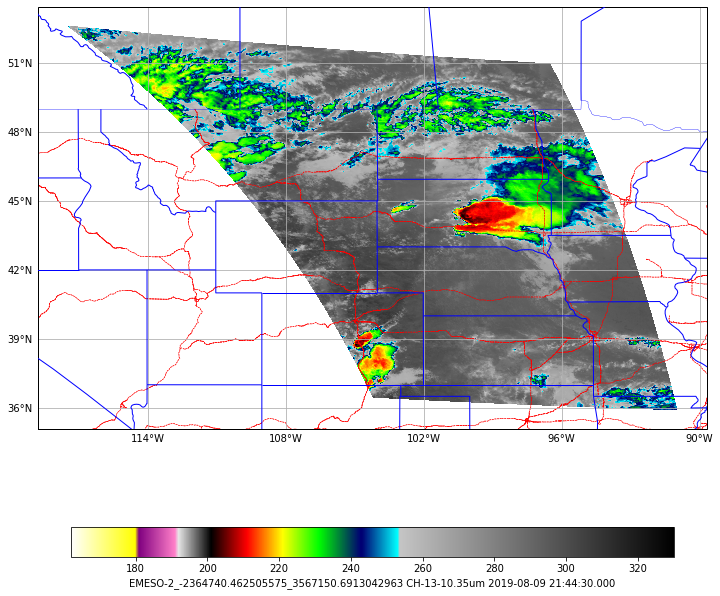

In [12]:

fig, ax = make_map(bbox=bbox)
# State boundaries
state_borders = cfeat.NaturalEarthFeature(
                category='cultural', name='admin_1_states_provinces_lines',
                scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='b', linewidth=1, zorder=3)
country_borders = cfeat.NaturalEarthFeature(category='cultural',
            name='admin_0_countries',scale='50m', facecolor='none')

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
#reader = shpreader.Reader('/Users/chowdahead/Downloads/countyl010g_shp_nt00964/countyl010g.shp')
#counties = list(reader.geometries())
#COUNTIES = cfeat.ShapelyFeature(counties,ccrs.PlateCarree())
#ax.add_feature(COUNTIES, facecolor='none',edgecolor='r')

reader = shpreader.Reader('/Users/chowdahead/Downloads/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
Roads = list(reader.geometries())
ROADS = cfeat.ShapelyFeature(Roads,ccrs.PlateCarree())
ax.add_feature(ROADS, facecolor='none',edgecolor='red',linestyle='--',linewidth=0.5)

ax.add_feature(country_borders,edgecolor='b',linewidth=0.2)
#ax.add_feature(states, linestyle='-',color='r')


cs = ax.pcolormesh(lons, lats, data, cmap=IR.IR_Colormap(),vmin=162.,vmax=330.) #cmap=IR.IR_Colormap(),vmin=162.,vmax=330.
cbar = fig.colorbar(cs, shrink=0.9, orientation='horizontal')
cbar.set_label(str(grid.getLocationName())+" " \
               +str(grid.getParameter())+" " \
               +str(grid.getDataTime().getRefTime()))
#plt.tight_layout()


In [ ]:

for i in range(0,25):
    i = i-100
    DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
    request = DataAccessLayer.newDataRequest()
    request.setDatatype("satellite")

    availableSectors = DataAccessLayer.getAvailableLocationNames(request)
    availableSectors.sort()

    print("\nAvailable sectors and products\n")
    for sect in availableSectors:
        request.setLocationNames(sect)
        availableProducts = DataAccessLayer.getAvailableParameters(request)
        availableProducts.sort()
        #print(sect + ":")
        #for prod in availableProducts:
            #print("  - "+prod)


    request.setLocationNames("EMESO-2")
    availableProducts = DataAccessLayer.getAvailableParameters(request)
    availableProducts.sort()



    request.setParameters(availableProducts[15])

    utc = datetime.datetime.utcnow()
    times = DataAccessLayer.getAvailableTimes(request)
    hourdiff = utc - datetime.datetime.strptime(str(times[i]),'%Y-%m-%d %H:%M:%S')
    hours,days = hourdiff.seconds/3600,hourdiff.days
    minute = str((hourdiff.seconds - (3600 * hours)) / 60)
    offsetStr = ''
    if hours > 0:
        offsetStr += str(hours) + "hr "
    offsetStr += str(minute) + "m ago"
    if days > 1:
        offsetStr = str(days) + " days ago"

    print("Found "+ str(len(times)) +" available times")
    print("  "+str(times[0]) + "\n    to\n  " + str(times[i]))
    print("Using "+str(times[i]) + " ("+offsetStr+")")
    response = DataAccessLayer.getGridData(request, [times[i]])
    grid = response[0]
    data = grid.getRawData()
    data = np.ma.masked_where(data<10,data)
    lons,lats = grid.getLatLonCoords()
    lats = np.nan_to_num(lats)
    lons = np.nan_to_num(lons)
    bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
    bbox = [-124.,-60,17.,52.]
    #bbox = [-110.,-90,30.,45.]
    print("grid size " + str(data.shape))
    print("grid extent " + str(list(bbox)))

    fig, ax = make_map(bbox=bbox)
    # State boundaries
    #states = cfeat.NaturalEarthFeature(category='cultural',
    #                                    name='admin_1_states_provinces_lines',
    #                                    scale='50m', facecolor='none')
    state_borders = cfeat.NaturalEarthFeature(
                    category='cultural', name='admin_1_states_provinces_lines',
                    scale='50m', facecolor='none')
    ax.add_feature(state_borders, edgecolor='b', linewidth=1, zorder=3)
    country_borders = cfeat.NaturalEarthFeature(category='cultural',
                name='admin_0_countries',scale='50m', facecolor='none')

    import cartopy.feature as cfeature
    import cartopy.io.shapereader as shpreader
    #reader = shpreader.Reader('/Users/chowdahead/Downloads/countyl010g_shp_nt00964/countyl010g.shp')
    #counties = list(reader.geometries())
    #COUNTIES = cfeat.ShapelyFeature(counties,ccrs.PlateCarree())
    #ax.add_feature(COUNTIES, facecolor='none',edgecolor='r')

    reader = shpreader.Reader('/Users/chowdahead/Downloads/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
    Roads = list(reader.geometries())
    ROADS = cfeat.ShapelyFeature(Roads,ccrs.PlateCarree())
    ax.add_feature(ROADS, facecolor='none',edgecolor='red',linestyle='--',linewidth=0.5)

    ax.add_feature(country_borders,edgecolor='b',linewidth=1)
    #ax.add_feature(states, linestyle='-',color='r')


    cs = ax.pcolormesh(lons, lats, data, cmap=IR.IR_Colormap(),vmin=162.,vmax=330.) #cmap=IR.IR_Colormap(),vmin=162.,vmax=330.
    #cbar = fig.colorbar(cs, shrink=0.9, orientation='horizontal')
    #cbar.set_label(str(grid.getLocationName())+" " \
    #               +str(grid.getParameter())+" " \
    #               +str(grid.getDataTime().getRefTime()))
    # Colorbar Axis Placement (under figure)
    colorbar_axis = [0.90, 0.2092, 0.025, 0.58] # [left, bottom, width, height]
    cbaxes = fig.add_axes(colorbar_axis)
    ax.yaxis.set_ticks_position('left')
    cbar = plt.colorbar(cs, orientation='vertical',cax=cbaxes,pad=0.2)
    
    text_time = ax.text(.995, 0.01, 
        str(times[i].getRefTime())[0:19],
        horizontalalignment='right', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')

    text_time2 = ax.text(0.005, 0.01, 
        "GOES"+" Ch 13 - IR",
        horizontalalignment='left', transform=ax.transAxes,
        color='white', fontsize=20, weight='bold')
    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)
    text_time2.set_path_effects(outline_effect)
    plt.tight_layout()
    #plt.show()
    save_path = "/Users/chowdahead/Desktop/"
    outfile = "GOES"+str(times[i].getRefTime())+".png"
    fig.savefig(save_path+outfile,bbox_inches='tight',dpi=120)

In [ ]:
str(times[i].getRefTime())

In [ ]:
'{0:%B %d}'.format(times[i].getRefTime())

In [ ]:
times[i].getRefTime()

In [ ]:
times[-92]

In [ ]:
# Standard map plot
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax


In [13]:
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [14]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [ ]:
# Create new figure
fig = plt.figure(figsize=(17., 11.))

#add_metpy_logo(fig, 30, 1000, size='small')

    # Add the map and set the extent
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# Plot city markers
political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax.add_feature(political_boundaries, linestyle='-', edgecolor='black')
ax.add_feature(states, linestyle='-', edgecolor='black',linewidth=2)

state_borders = cfeature.NaturalEarthFeature(
                category='cultural', name='admin_1_states_provinces_lines',
                scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='b', linewidth=1, zorder=3)
country_borders = cfeature.NaturalEarthFeature(category='cultural',
            name='admin_0_countries',scale='50m', facecolor='none')



# load the shapefile, use the name 'states'
#map.readshapefile('st99_d00', name='states', drawbounds=True)
reader = shpreader.Reader('/Users/chowdahead/Downloads/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties,ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none',edgecolor='r')



    
# Server, Data Request Type, and Database Table
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest('maps')
request.addIdentifier('table', 'mapdata.county')

# Define a WFO ID for location
# tie this ID to the mapdata.county column "cwa" for filtering
request.setLocationNames('ABR')
request.addIdentifier('cwa', 'ABR')

# enable location filtering (inLocation)
# locationField is tied to the above cwa definition (BOU)
request.addIdentifier('geomField', 'the_geom')
request.addIdentifier('inLocation', 'true')
request.addIdentifier('locationField', 'cwa')

# This is essentially the same as "'"select count(*) from mapdata.cwa where cwa='BOU';" (=1)

# Get response and create dict of county geometries
response = DataAccessLayer.getGeometryData(request, [])
counties = np.array([])
for ob in response:
    counties = np.append(counties,ob.getGeometry())
print("Using " + str(len(counties)) + " county MultiPolygons")


%matplotlib inline
# All WFO counties merged to a single Polygon
merged_counties = cascaded_union(counties)
envelope = merged_counties.buffer(2)
boundaries=[merged_counties]

# Get bounds of this merged Polygon to use as buffered map extent
bounds = merged_counties.bounds
bbox=[bounds[0]-1,bounds[2]+1,bounds[1]-1.5,bounds[3]+1.5]


fig, ax = make_map(bbox=bbox)
# Plot political/state boundaries handled by Cartopy
political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax.add_feature(political_boundaries, linestyle='-', edgecolor='black')
ax.add_feature(states, linestyle='-', edgecolor='black',linewidth=2)


for i, geom in enumerate(boundaries):
    gbounds = Polygon(geom)
    intersection = gbounds.intersection
    geoms = (intersection(geom)
         for geom in boundaries
         if gbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle="-",linewidth=3.,edgecolor='#cc5000')
    ax.add_feature(shape_feature)



#####################################################################################################

request = DataAccessLayer.newDataRequest('maps', envelope=envelope)
request.addIdentifier('table', 'mapdata.city')
request.addIdentifier('geomField', 'the_geom')
request.setParameters('name','population','prog_disc')
cities = DataAccessLayer.getGeometryData(request, [])
print("Found " + str(len(cities)) + " city Points")

citylist = []
cityname = []
# For BOU, progressive disclosure values above 50 and pop above 5000 looks good
for ob in cities:
    if ((ob.getNumber("prog_disc")>50) and ob.getString("population") !="None"):
        if int(ob.getString("population")) > 5000:
    #if ((ob.getNumber("prog_disc")>7000)):
            print(ob.getNumber("prog_disc"))
            citylist.append(ob.getGeometry())
            cityname.append(ob.getString("name"))
            print("city pops: ",ob.getString("population"))
citylist.append(ob.getGeometry())
cityname.append(ob.getString("name"))
print("Using " + str(len(cityname)) + " city Points")

print(list(cityname))

#####################################################################################################

    
    
    
    
    
cs = ax.pcolormesh(lons, lats, data, cmap=IR.IR_Colormap(),vmin=162.,vmax=330.) #cmap=IR.IR_Colormap(),vmin=162.,vmax=330.
cbar = fig.colorbar(cs, shrink=0.9, orientation='horizontal')
# Plot CWA counties
for i, geom in enumerate(counties):
    cbounds = Polygon(geom)
    intersection = cbounds.intersection
    geoms = (intersection(geom)
         for geom in counties
         if cbounds.intersects(geom))
    shape_feature = ShapelyFeature(geoms,ccrs.PlateCarree(), 
                        facecolor='none', linestyle=":",edgecolor='#cc5300')#'#86989B'
    ax.add_feature(shape_feature)
    
geolocator = Nominatim()
for city in cityname:
    #print(city)
    loc = geolocator.geocode(city)
    try:
        #bounds[0],bounds[2],bounds[1],bounds[3]
        if bounds[0] < loc.longitude < bounds[2] and bounds[1] < loc.latitude < bounds[3]:
            print(city,loc.longitude,loc.latitude)
            ax.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10)
            ax.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k')#linewidth=4,
    except:
        "nothing?"
ax.set_extent([bounds[0]-1,bounds[2]+1,bounds[1]-1,bounds[3]+1],ccrs.PlateCarree())
plt.show()
#plt.savefig("/Users/chowdahead/Desktop/Fuuuuck.png",bbox_inches="tight",dpi=200)

Using 28 county MultiPolygons
Found 2227 city Points
3320
city pops:  24658
460
city pops:  24658
3220
city pops:  6540
500
city pops:  6540
2460
city pops:  20237
2460
city pops:  20237
3310
city pops:  20237
3260
city pops:  11893
2460
city pops:  13876
3280
city pops:  13876
3300
city pops:  18504
5140
city pops:  5693
9500
city pops:  123975
3290
city pops:  14558
7000
city pops:  13528
7000
city pops:  9765
200
city pops:  11917
8410
city pops:  32177
500
city pops:  5555
1390
city pops:  5555
3590
city pops:  13178
200
city pops:  13178
600
city pops:  13178
8000
city pops:  12735
3750
city pops:  49321
3650
city pops:  8586
3630
city pops:  6826
7701
city pops:  90599
3680
city pops:  14940
1338
city pops:  7751
5200
city pops:  7512
5230
city pops:  7751
5310
city pops:  14732
5330
city pops:  23516
5110
city pops:  5583
5260
city pops:  8959
5250
city pops:  11925
800
city pops:  8959
200
city pops:  8959
5120
city pops:  5634
4387
city pops:  5634
7740
city pops:  8192
7780
c

/Users/chowdahead/miniconda3/envs/py-awips/lib/python3.7/site-packages/ipykernel_launcher.py:145: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Pierre -100.351185 44.368305
Brookings -96.79844 44.311461
Sioux Falls -96.700327 43.5499749


In [20]:
bounds[0],bounds[2],bounds[1],bounds[3]


(-102.00079345699999,
 -96.10359954799998,
 43.499511719000054,
 46.02250671400003)

In [ ]:
lons.min(), lons.max(), lats.min(), lats.max()

In [ ]:
from netCDF4 import Dataset
import numpy as np
import os

# navigate to directory with .nc data files (raw radiance files in my case)
os.chdir('/Users/chowdahead/Downloads/')
full_direc = os.listdir()
nc_files = [ii for ii in full_direc if ii.endswith('.nc')]
nc_indx = 0
g16_data_file = nc_files[nc_indx] # select .nc file
print(nc_files[nc_indx]) # print file name

# designate dataset
g16nc = Dataset(g16_data_file, 'r')

# GOES-R projection info and retrieving relevant constants
proj_info = g16nc.variables['goes_imager_projection']
lon_origin = proj_info.longitude_of_projection_origin
H = proj_info.perspective_point_height+proj_info.semi_major_axis
r_eq = proj_info.semi_major_axis
r_pol = proj_info.semi_minor_axis

# Data info
lat_rad_1d = g16nc.variables['x'][:]
lon_rad_1d = g16nc.variables['y'][:]

# close file when finished
g16nc.close()
g16nc = None

# create meshgrid filled with radian angles
lat_rad,lon_rad = np.meshgrid(lat_rad_1d,lon_rad_1d)

# lat/lon calc routine from satellite radian angle vectors

lambda_0 = (lon_origin*np.pi)/180.0

a_var = np.power(np.sin(lat_rad),2.0) + (np.power(np.cos(lat_rad),2.0)*(np.power(np.cos(lon_rad),2.0)+(((r_eq*r_eq)/(r_pol*r_pol))*np.power(np.sin(lon_rad),2.0))))
b_var = -2.0*H*np.cos(lat_rad)*np.cos(lon_rad)
c_var = (H**2.0)-(r_eq**2.0)

r_s = (-1.0*b_var - np.sqrt((b_var**2)-(4.0*a_var*c_var)))/(2.0*a_var)

s_x = r_s*np.cos(lat_rad)*np.cos(lon_rad)
s_y = - r_s*np.sin(lat_rad)
s_z = r_s*np.cos(lat_rad)*np.sin(lon_rad)

lat = (180.0/np.pi)*(np.arctan(((r_eq*r_eq)/(r_pol*r_pol))*((s_z/np.sqrt(((H-s_x)*(H-s_x))+(s_y*s_y))))))
lon = (lambda_0 - np.arctan(s_y/(H-s_x)))*(180.0/np.pi)


# print test coordinates
print('{} N, {} W'.format(lat[318,1849],abs(lon[318,1849])))